<span style="font-size: 14pt">Домашнее задание №8 </span>

<span style="color: red; font-size: 14pt">Deadline: 20.05.2017 23:59:59</span>

<span style="font-size: 10pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, Модуль Unspervised Learning, </span>

<span style="color:blue; font-size: 10pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 10pt; font-family: 'Verdana'">alexromsput@gmail.com</span>


<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Воронцов К. В. Математические методы обучения по прецедентам. 2012. http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf (разделы 5.2 и 7.1)
- Hastie T., Tibshirani R., Friedman J. The Elements of Statistical Learning. Springer: Data Mining, Inference, and Prediction.  — 2nd ed. — Springer-Verlag. 2009. — 746 p.http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf (глава 14)



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_fall 496 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2017_496_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Дедлайн жесткий, в том числе помтоу что это ДЗ последнее в курсе. 

In [92]:
import os
import time
import warnings
import datetime
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import cross_val_score

import pylab

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


from IPython.display import Image, SVG

%matplotlib inline

<h1 align="center">Контрольные вопросы (0 % - для самоконтроля) </h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: В чём заключается проблема мультиколлинеарности?

**Вопрос 2**: Какие проблемы при обучении алгоритмов возникают из-за большой разамерности пространства признаков?

**Вопрос 3**: В чем суть проклятия размерности?

** Вопрос 4**: Какая связь между решением задачи PCA и SVD-разложение матрицы регрессии?

** Вопрос 5**: Почему в tSNE расстояние между парамми объектов измеряется "по-стьюденту" и как это помогает решить проблему "скрученности" (crowding problem)?

**Вопрос 6**: На какой идее базируются алгоритмы аггломеративной кластеризации? Напишите формулу Ланса-Вильма

**Вопрос 7**: Какие два шага выделяют в алгоритме кластеризации k-means?

**Вопрос 8**: В чём отличия (основные упрощения) k-means от EM-алгоритма кластеризации?

** Вопрос 9 **Какой принцип работы графовых алгоритмов кластеризации?

** Вопрос 10 **  В чем некорректность постановки задачи кластеризации?

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Вопросы по теории (30%) </h1> 

** Задача 1 ** 
Ответьте на вопросы:

 1) Как можно не прибегая к визуализации понять, что кластерная структура у данного облака точек отсутствует?
 2) Какие из алгоритмов кластеризации могут выделять кластеры с ленточной структурой? 
 3) Какие алгоритмы кластеризации чувствительны к шуму и перемычкам?
 4) Каким образом приближают «центр кластера» в нелинейных пространствах?
 5) Каким образом можно определять число кластеров?
 
** Задача 2 **
Даны пять точек на числовой оси $X = (1; 5; 7; 8; 8)$, число кластеров равно 2. Рассчитайте ответ алгоритма  K-means (финальные центры кластеров), если начальные центры кластеров c1 = 1, c2 = 10.

** Задача 3 **
Докажите, что the k-means всегда сходится.

** Задача 4 **
Для сжатия размерности пространства алгоритм PCA применяется датасету с количеством признаков $D = 100$. Наблюдается следующий спектр собственных значений матрицы объектов-признаков. 
<img src="PCA_lambda.png" width="600">
Ответье на вопросы

* 1) Высокая ли эффективная размерность пространства признаков (intrinsic dimensionality) (насколько она близка к 100)?
* 2) Можно ли перевести датасет с помощью PCA в пространство меньшей размерности с минимальными потерями точности? Если да, то чему примерно будет равна размернось 

<h2 align="center">Практическое задание 1 (30%) </h2>
Реализуйте PCA

In [104]:
import numpy as np
import pylab as plt
'''
Performs the Principal Coponent analysis of the Matrix F
Matrix must be n * l dimensions
where n is # features
l is # samples
'''

def PCA(F, varRetained = 0.95, show = False):
    # Input
    #     F - initaial matrix 
    # Compute Covariance Matrix Sigma
    # Input
    (n, l) = F.shape
    F = np.matrix(F)
    Sigma = 1.0 / l * F * np.transpose(F)
    # Compute eigenvectors and eigenvalues of Sigma by SVD
    # U, V - matrix, d - array: Sigma = U * np.diag(d) * V
    U, d, V = np.linalg.svd(Sigma, full_matrices=True)

    # compute the value m: number of minumum features that retains the given variance varRetaine
    dTot = np.sum(d)
    var_i = np.array([np.sum(d[: i + 1]) /
                dTot * 100.0 for i in range(n)])
    m = np.searchsorted(var_i, varRetained*100, side='left')
    print ('{:.2f} variance retained in {} dimensions'.format(var_i[m], m + 1))

    # plot the variance plot
    if show:
        plt.figure(figsize=(10,5))
        plt.plot(var_i)
        plt.xlabel('Number of Features')
        plt.ylabel(' Percentage Variance retained')
        plt.title(r'PCA $\% \sigma^2 $ vs # features')
        plt.grid(True)
        plt.show()

    # compute the reduced dimensional features by projection
    D_reduced = np.diag(d[:m+1])
    U_reduced = (U.T[:m+1]).T
    V_reduced = V[:m+1]
#     G = вычислить матрицу в преобразованном пространстве
    G = U_reduced * D_reduced * V_reduced
    return G, U_reduced

In [105]:
# Примените алгоритм к данным MNIST
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

Performing PCA - Principal COmponent Analysis
95.25 variance retained in 16 dimensions


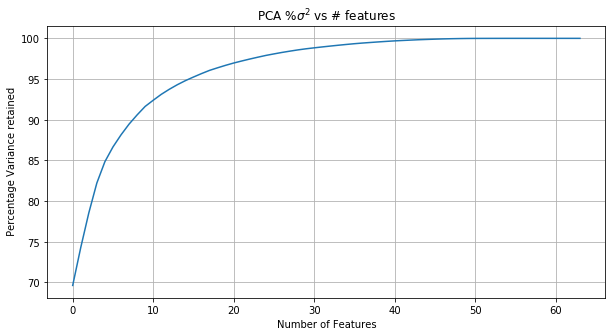

In [106]:
#################################################################
# PCA of training set
print ('Performing PCA - Principal COmponent Analysis')

Z, U_reduced = PCA(X.T, varRetained = 0.95, show = True)

In [107]:
print(Z)
print(U_reduced)

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.40461975   3.85385319 ...,   1.93113404   0.93806917
    0.20400681]
 [  0.           3.85385319  48.03408716 ...,  33.96100041  12.70565688
    2.88529215]
 ..., 
 [  0.           1.93113404  33.96100041 ...,  78.07100653  30.26631322
    5.54388602]
 [  0.           0.93806917  12.70565688 ...,  30.26631322  17.12818143
    4.12209699]
 [  0.           0.20400681   2.88529215 ...,   5.54388602   4.12209699
    1.42070898]]
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [-0.00577193 -0.01736194  0.0098574  ...,  0.02193748 -0.01576565
   0.00147984]
 [-0.10069602 -0.2242008   0.04480717 ...,  0.13329258 -0.06654696
  -0.14158377]
 ..., 
 [-0.13088512 -0.09012861 -0.18321057 ...,  0.07714815  0.01982268
  -0.02043831]
 [-0.03923437 -0.03684109 -0.02149533 ...,  0.11038973  0.08762639
  -0.14644307]
 [-0.00676005 -0.01151507  0.00640454 ..., -0.00490

<h1 align="center"><h2 align="center">Практическое задание 2 (40%) </h2> </h1>

<h2 align="left">Изучение алгоритмов кластеризации на разных выборках</h2>

### Кластеризация цифр с помощью dbscan
На данных из sklearn.datasets.load_digits примените алгоритмы кластеризации (знания о метках классов при кластеризации использовать нельзя):
 - <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN'>dbscan </a> 
 запускайте при различных параметрах eps и minsamples, для всех экспериментов можете выбрать одну метрику (вспомните семинар про  метрические алгоритмы);
 - Используя метки классов цифр, оцените качество различных кластеризаций при помощи Adjusted Mutual Information и Adjusted Rand Index. 
 - визуалируйте изображения тех цифр, которые соответствуют core_points;
 - визуалируйте изображения тех цифр, которые соответствуют выбросам;
 - сделайте выводы и применимости алгоритмов.

### Уменьшение палитры изображения
 - для <a href="https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg"> картинки </a> 
нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселам изображения; после выделения кластеров,
все пикселы, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру. 
 - Попробуйте различные алгоритмы кластеризации:
        -- KMeans
        -- MeanShift
        -- AgglomerativeClustering
   Рассмотрите число кластеров K = 2, 3, 10, 20
 - Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи
метрики <a href="http://scikit-image.org/docs/dev/api/skimage.measure.html"> SSIM</a>. Какой способ оказался лучшим?

In [109]:
from sklearn.datasets import load_digits

In [110]:
data = load_digits()

(1797, 64)


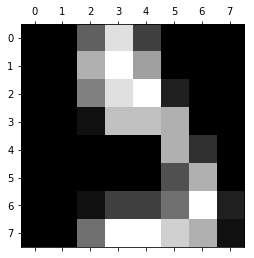

array([0, 1, 2, ..., 8, 9, 8])

In [120]:
print(data.data.shape)
plt.gray() 
plt.matshow(data.images[19]) 
plt.show() 
data.target

In [154]:
X = data.images.reshape([len(data.images),-1])
y = data.target

In [150]:
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

В $\mathbb{R}^n$ все метрики эквивалентны + размерность данных достаточно большая, значит выберем метрику по которой легче всего оценить порядок $\varepsilon$ (например через общую выборочную дисперсию): $l_2$


In [156]:
D = np.var(X)
D

36.201732405857257

In [153]:
len(X), X.shape

(1797, (1797, 64))

можно ожидать, что средние расстояния будут порядка $\sqrt{8\cdot8\cdot D} \sim 50$

In [ ]:
%%time
eps = [10, 20, 50]
min_samples = [10, 20, 30]
for e in eps:
    for n in min_samples:
        db = DBSCAN(
                    eps=e, 
                    min_samples=n, 
                    metric = lambda X, Y: distance.euclidean(X,Y), 
                    algorithm='auto'
        ).fit(X)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        print('for DBSCAN with eps = {} and min_samples = {}:'.format(e, n))
        print('Estimated number of clusters: %d' % n_clusters_)
        print("Adjusted Rand Index: %0.3f"
              % adjusted_rand_score(y, labels))
        print("Adjusted Mutual Information: %0.3f"
              % adjusted_mutual_info_score(y, labels))
        print()

for DBSCAN with eps = 10 and min_samples = 10:
Estimated number of clusters: 0
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000

for DBSCAN with eps = 10 and min_samples = 20:
Estimated number of clusters: 0
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000

for DBSCAN with eps = 10 and min_samples = 30:
Estimated number of clusters: 0
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000

for DBSCAN with eps = 20 and min_samples = 10:
Estimated number of clusters: 14
Adjusted Rand Index: 0.248
Adjusted Mutual Information: 0.566

for DBSCAN with eps = 20 and min_samples = 20:
Estimated number of clusters: 4
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.241



23.706539182259394